### This notebook is designed for the exploration of the K-Means algorithm...
#### 1. Arbitrary data sets can be created...
#### 2. K-Means algo can be run with different intializations ('forgy', 'random', k_means++)... 

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from KMeans import KMeans

#### Create Data...

In [23]:
np.random.seed(3)

# controls distance between clusters...
d_scalar = 2.0
# control size of clusters...
s_scalar = 0.5
# number of dimensions...
dimensions = 4
# data points per cluster...
n_data = 500
# actual number of clusters...
n_clusters = 5

# create data offsets
c = [d_scalar * np.random.randn(1, dimensions) for i in range(n_clusters)]
# create scaled data with offsets
x = [s_scalar * np.random.randn(n_data, dimensions) - c[i] for i in range(n_clusters)]

X = np.concatenate(x, axis=0)

<IPython.core.display.Javascript object>


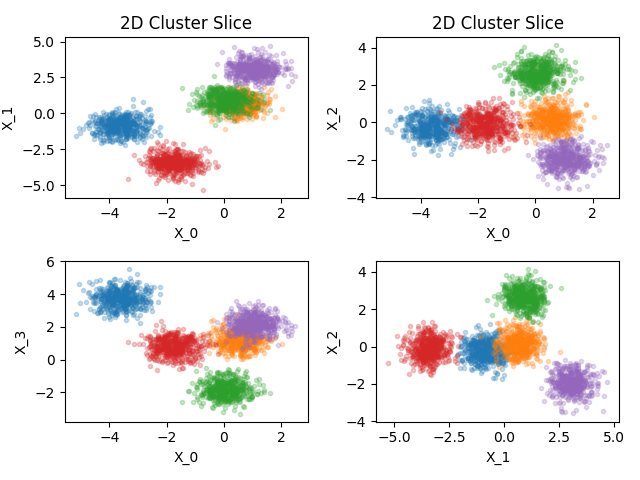

In [24]:
plt.figure()
plt.subplot(221)
plt.title('2D Cluster Slice')
for i in range(n_clusters):
    plt.scatter(x[i][:,0], x[i][:,1], marker='.', alpha=0.25)
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.subplot(222)
plt.title('2D Cluster Slice')
for i in range(n_clusters):
    plt.scatter(x[i][:,0], x[i][:,2], marker='.', alpha=0.25)
plt.xlabel('X_0')
plt.ylabel('X_2')
plt.subplot(223)
for i in range(n_clusters):
    plt.scatter(x[i][:,0], x[i][:,3], marker='.', alpha=0.25)
plt.xlabel('X_0')
plt.ylabel('X_3')
plt.subplot(224)
for i in range(n_clusters):
    plt.scatter(x[i][:,1], x[i][:,2], marker='.', alpha=0.25)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.tight_layout()

#### Cluster via KMeans

In [21]:
trial_clusters = [2, 3, 4, 6, 8, 10, 15, 20]
inertia_lst = []

for i in trial_clusters:
    kmeans = KMeans(n_clusters=i, init='kmeans++', max_iter=100)
    kmeans.fit(X)
    inertia_lst.append(kmeans.inertia)

<IPython.core.display.Javascript object>


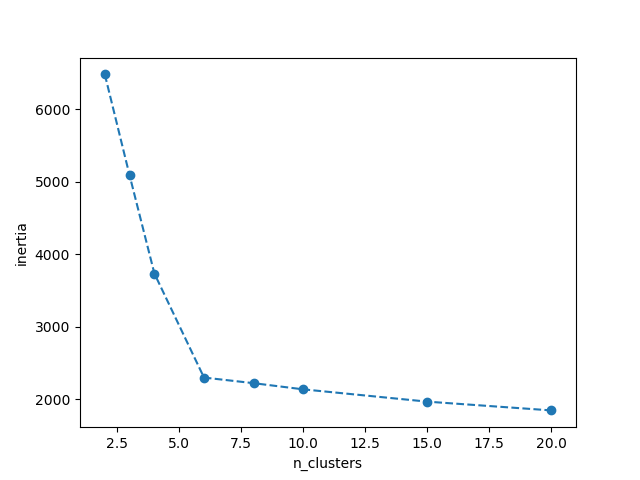

In [22]:
plt.figure()
plt.plot(trial_clusters, inertia_lst, 'o--')
plt.xlim(min(trial_clusters) - 1, max(trial_clusters) + 1)
plt.ylabel('inertia')
plt.xlabel('n_clusters')

#### Depending on the data set and the degree of algorithm convergence, the 'eblow' should be visable.  The 'eblow' is a discontinuity of the second derivative of the inertia as a function of clusters... This 'elbow' is our best guess as the correct estimation of the actual number of clusters...